In [22]:
markets = [
    'ACB.VN',
    'BCM.VN',
    'BID.VN',
    'BVH.VN',
    'CTG.VN',
    'FPT.VN',
    'GAS.VN',
    'GVR.VN',
    'HDB.VN',
    'HPG.VN',
    'MBB.VN',
    'MSN.VN',
    'MWG.VN',
    'PLX.VN',
    'POW.VN',
    'SAB.VN',
    'SHB.VN',
    'SSB.VN',
    'SSI.VN',
    'STB.VN',
    'TCB.VN',
    'TPB.VN',
    'VCB.VN',
    'VHM.VN',
    'VIB.VN',
    'VIC.VN',
    'VJC.VN',
    'VNM.VN',
    'VPB.VN',
    'VRE.VN',
]

In [23]:
import yfinance as yf

data = []
for stock in markets:
    data.append(yf.download(stock, start="2023-01-01", end="2024-04-1"))

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

**HÀM NÀY DÙNG ĐỂ LẤY BIẾN ĐỘNG GIÁ CẢ TRONG KHOẢNG TỪ START ĐẾN END DATE**

Như vậy thời gian giao dịch chứng khoán cơ sở tại Việt Nam là:

Ngày giao dịch: Từ thứ Hai đến thứ Sáu, trong giờ hành chính nhà nước. 

Ngày cuối tuần (thứ Bảy, Chủ Nhật) và ngày lễ tết không tiến hành giao dịch chứng khoán. Các ngày lễ tết không giao dịch chứng khoán ở Việt Nam bao gồm: Tết Dương lịch, Tết Âm lịch, ngày Giỗ tổ Hùng Vương (10/3 Âm lịch), ngày 30/4, ngày 1/5, ngày Quốc khánh 2/9.


Không giao dịch trong những trường hợp hi hữu (như có quy định khẩn cấp hoặc thị trường gặp sự cố).

In [58]:
import numpy as np
import pandas as pd
def TakeMovement(start_date, end_date):
    movement = []
    for dt in data:
        filtered_data = dt.loc[start_date:end_date]
        open_prices = filtered_data['Open']
        close_prices = filtered_data['Close']
        movement.append(close_prices - open_prices)
    return np.array(movement)

Anh em để 5 ngày thoi

In [49]:
movement = TakeMovement("2024-03-25", "2024-03-29")

In [52]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

new = normalizer.fit_transform(movement)

print(new.max())
print(new.min())
print(new.mean())

0.9850365626224087
-0.8867963503478639
-0.06894728039509841


In [63]:
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

normalizer = Normalizer()

kmeans = KMeans(n_clusters=5, max_iter=1000)

pipeline = make_pipeline(normalizer,kmeans)

In [64]:
pipeline.fit(movement)

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(max_iter=1000, n_clusters=5))])

In [65]:
labels = pipeline.predict(movement)

df = pd.DataFrame({'labels': labels, 'companies': markets})

print(df.sort_values('labels'))

    labels companies
14       0    POW.VN
20       0    TCB.VN
13       0    PLX.VN
11       0    MSN.VN
9        0    HPG.VN
6        0    GAS.VN
29       0    VRE.VN
2        0    BID.VN
1        0    BCM.VN
0        1    ACB.VN
4        1    CTG.VN
26       1    VJC.VN
12       1    MWG.VN
17       1    SSB.VN
3        2    BVH.VN
25       2    VIC.VN
15       2    SAB.VN
22       2    VCB.VN
21       2    TPB.VN
27       3    VNM.VN
23       3    VHM.VN
18       3    SSI.VN
16       3    SHB.VN
19       3    STB.VN
5        4    FPT.VN
24       4    VIB.VN
28       4    VPB.VN
10       4    MBB.VN
8        4    HDB.VN
7        4    GVR.VN


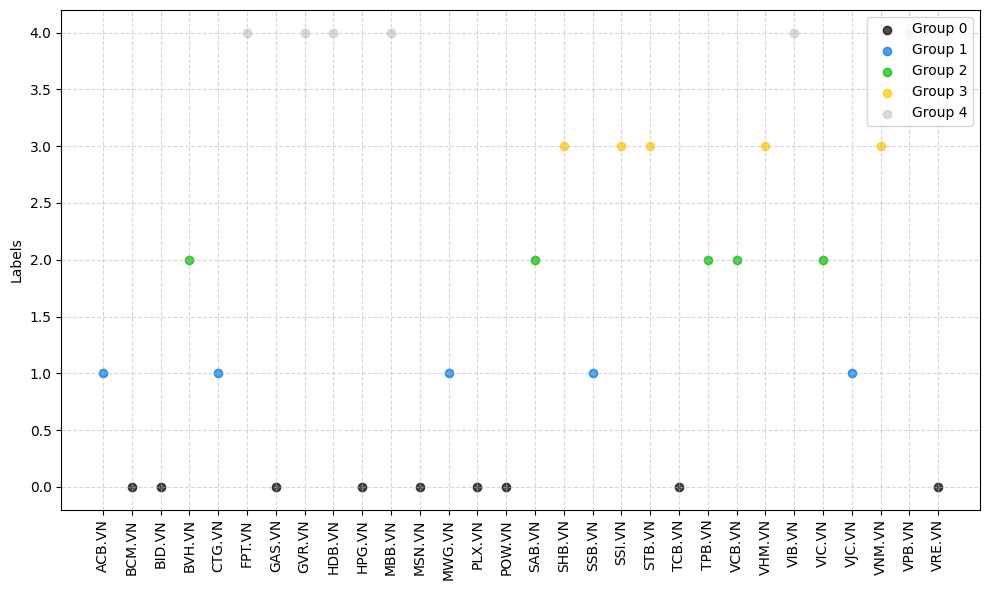

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
num_clusters = len(df['labels'].unique())
colors = plt.cm.nipy_spectral(np.linspace(0, 1, num_clusters))

for label, color in zip(range(num_clusters), colors):
    subset = df[df['labels'] == label]
    plt.scatter(subset.index, subset['labels'], color=color, label=f'Group {label}', alpha=0.7)

plt.xticks(range(len(df)), df['companies'], rotation=90)
plt.xlabel('', rotation=90)
plt.ylabel('Labels')
plt.title('')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)  # Thêm grid
plt.tight_layout()
plt.show()